Version 1.0.2

# Pandas basics 

Hi! In this programming assignment you need to refresh your `pandas` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`]()`s to solve the task. 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 

pd.options.display.float_format = '{:,.2f}'.format

In [2]:
DATA_FOLDER = '../readonly/final_project_data/'

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

In [3]:
print('size of transactions:    {:,}'.format(transactions.size))
print('size of items:           {:,}'.format(items.size))
print('size of item_categories: {:,}'.format(item_categories.size))
print('size of shops:           {:,}'.format(shops.size))

size of transactions:    17,615,094
size of items:           66,510
size of item_categories: 168
size of shops:           120


The dataset we are going to use is taken from the competition, that serves as the final project for this course. You can find complete data description at the [competition web page](https://www.kaggle.com/c/competitive-data-science-final-project/data). To join the competition use [this link](https://www.kaggle.com/t/1ea93815dca248e99221df42ebde3540).

## Grading

We will create a grader instace below and use it to collect your answers. When function `submit_tag` is called, grader will store your answer *locally*. The answers will *not* be submited to the platform immediately so you can call `submit_tag` function as many times as you need. 

When you are ready to push your answers to the platform you should fill your credentials and run `submit` function in the <a href="#Authorization-&-Submission">last paragraph</a>  of the assignment.

In [4]:
# grader = Grader()

# Task

Let's start with a simple task. 

<ol start="0">
  <li><b>Print the shape of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.</b></li>
</ol>

In [5]:
# YOUR CODE GOES HERE
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.00
1,03.01.2013,0,25,2552,899.00,1.00
2,05.01.2013,0,25,2552,899.00,-1.00
3,06.01.2013,0,25,2554,"1,709.05",1.00
4,15.01.2013,0,25,2555,"1,099.00",1.00


In [6]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [7]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [8]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


Now use your `pandas` skills to get answers for the following questions. 
The first question is:

1. ** What was the maximum total revenue among all the shops in September, 2014?** 


* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 9` in order to select target subset of dates.
* You may work with `date` feature as with srings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [9]:
transactions['date']= pd.to_datetime(transactions['date'], format='%d.%m.%Y')
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.00
1,2013-01-03,0,25,2552,899.00,1.00
2,2013-01-05,0,25,2552,899.00,-1.00
3,2013-01-06,0,25,2554,"1,709.05",1.00
4,2013-01-15,0,25,2555,"1,099.00",1.00


In [10]:
transactions['revenue'] = transactions['item_price'] * transactions['item_cnt_day']
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue
0,2013-01-02,0,59,22154,999.00,1.00,999.00
1,2013-01-03,0,25,2552,899.00,1.00,899.00
2,2013-01-05,0,25,2552,899.00,-1.00,-899.00
3,2013-01-06,0,25,2554,"1,709.05",1.00,"1,709.05"
4,2013-01-15,0,25,2555,"1,099.00",1.00,"1,099.00"


In [11]:
transactions_2014_09 = transactions.where((transactions.date.dt.year == 2014) & (transactions.date.dt.month == 9)).dropna()
transactions_2014_09.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue
1953691,2014-09-24,20.00,5.00,"1,039.00",899.00,1.00,899.00
1953692,2014-09-27,20.00,5.00,"1,015.00",449.00,1.00,449.00
1953693,2014-09-07,20.00,5.00,"1,329.00",399.00,1.00,399.00
1953694,2014-09-27,20.00,5.00,984.00,399.00,1.00,399.00
1953695,2014-09-08,20.00,5.00,984.00,399.00,1.00,399.00


In [12]:
transactions_2014_09.describe()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue
count,73157,"73,157.00","73,157.00","73,157.00","73,157.00","73,157.00","73,157.00"
mean,2014-09-15 17:03:27.220088320,20.00,33.66,"10,111.88","1,057.38",1.36,"1,568.18"
min,2014-09-01 00:00:00,20.00,2.00,0.00,3.00,-3.00,"-20,990.00"
25%,2014-09-08 00:00:00,20.00,24.00,"4,750.00",299.00,1.00,299.00
50%,2014-09-15 00:00:00,20.00,31.00,"8,766.00",499.00,1.00,529.00
75%,2014-09-23 00:00:00,20.00,48.00,"15,470.00","1,102.40",1.00,"1,348.50"
max,2014-09-30 00:00:00,20.00,59.00,"22,167.00","30,600.00",149.00,"699,972.00"
std,NaN,0.00,16.17,"6,231.63","2,139.24",2.13,"5,699.95"


In [13]:
transactions_2014_09_revenue_by_shop = transactions_2014_09.groupby('shop_id')['revenue'].sum()
transactions_2014_09_revenue_by_shop

shop_id
2.00    1,473,540.00
3.00    1,228,425.00
4.00    1,211,556.00
5.00    1,350,828.02
6.00    3,480,397.00
7.00    2,127,491.00
10.00     774,404.00
12.00   6,378,335.00
14.00   1,499,621.00
15.00   2,383,940.50
16.00   1,919,162.00
17.00   1,385,955.00
18.00   2,132,611.00
19.00   2,050,485.00
21.00   2,023,240.70
22.00   2,175,790.00
24.00   1,956,967.50
25.00   6,783,338.00
26.00   2,504,839.00
27.00   4,899,292.00
28.00   4,985,847.00
29.00   2,071,339.00
30.00   1,902,539.50
31.00   7,982,852.20
33.00     539,115.00
34.00     482,970.01
35.00   2,323,137.30
37.00   1,401,708.33
38.00   2,472,334.00
39.00     778,863.00
40.00     353,867.00
41.00   1,133,782.00
42.00   4,753,366.00
43.00   2,793,483.00
44.00   1,049,886.61
45.00   1,199,660.00
46.00   2,703,858.00
47.00   2,487,424.00
48.00   1,463,744.00
49.00     875,452.00
50.00   1,872,948.50
51.00     765,001.00
52.00   1,520,397.00
53.00   1,914,577.00
54.00   4,839,335.00
55.00   1,794,684.00
56.00   1,780,581.80
57.00

In [14]:
transactions_2014_09_revenue_by_shop.describe()

count          50.00
mean    2,294,471.88
std     1,636,869.24
min       353,867.00
25%     1,359,609.76
50%     1,916,869.50
75%     2,483,651.50
max     7,982,852.20
Name: revenue, dtype: float64

In [15]:
transactions_2014_09_revenue_by_shop.max()

7982852.199999957

In [16]:
# YOUR CODE GOES HERE

transactions['revenue'] = transactions['item_price'] * transactions['item_cnt_day']
transactions_result = transactions.loc[(transactions['date'].dt.year == 2014) & (transactions['date'].dt.month == 9)]
max_revenue = transactions_result.groupby('shop_id')['revenue'].sum().max()

# grader.submit_tag('max_revenue', max_revenue)
print(max_revenue)

7982852.199999957


Great! Let's move on and answer another question:

<ol start="2">
  <li><b>What item category generated the highest revenue in summer 2014?</b></li>
</ol>

* Submit `id` of the category found.
    
* Here we call "summer" the period from June to August.

*Hints:*

* Note, that for an object `x` of type `pd.Series`: `x.argmax()` returns **index** of the maximum element. `pd.Series` can have non-trivial index (not `[1, 2, 3, ... ]`).

In [17]:
transactions_2014_summer = transactions.loc[
    (transactions['date'].dt.year == 2014) & 
    (transactions['date'].dt.month >= 6) & 
    (transactions['date'].dt.month <= 8)
]
transactions_2014_summer.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue
1705909,2014-06-15,17,26,9532,399.00,1.00,399.00
1705910,2014-06-10,17,26,9507,149.00,1.00,149.00
1705911,2014-06-13,17,26,9509,246.32,1.00,246.32
1705912,2014-06-03,17,26,9532,399.00,1.00,399.00
1705913,2014-06-08,17,26,9532,399.00,1.00,399.00


In [18]:
transactions_2014_summer.describe()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue
count,247782,"247,782.00","247,782.00","247,782.00","247,782.00","247,782.00","247,782.00"
mean,2014-07-16 20:37:35.001574144,18.02,33.88,"10,134.16",869.78,1.18,"1,003.95"
min,2014-06-01 00:00:00,17.00,2.00,1.00,0.50,-16.00,"-22,990.00"
25%,2014-06-23 00:00:00,17.00,24.00,"4,644.25",239.00,1.00,249.00
50%,2014-07-17 00:00:00,18.00,31.00,"8,482.00",399.00,1.00,399.00
75%,2014-08-10 00:00:00,19.00,49.00,"15,972.75",899.00,1.00,999.00
max,2014-08-31 00:00:00,19.00,59.00,"22,167.00","30,600.00",501.00,"226,497.00"
std,NaN,0.83,16.27,"6,303.14","1,789.76",1.69,"2,686.80"


In [19]:
revenue_2014_summer_by_category = (
    pd.merge(transactions_2014_summer, items, how='left', on='item_id')
    .groupby('item_category_id')['revenue'].sum()
    .reset_index(name="total_revenue")
)
revenue_2014_summer_by_category

,item_category_id,total_revenue
0,2,"2,755,520.00"
1,3,"6,854,669.80"
2,4,"38,833.20"
3,5,"418,233.10"
4,6,"3,360,382.50"
...,...,...
61,78,"55,771.00"
62,79,"1,080,480.00"
63,81,599.00
64,82,"1,629.00"


In [20]:
stats = revenue_2014_summer_by_category.describe()
stats

,item_category_id,total_revenue
count,66.00,66.00
mean,42.77,"3,769,099.28"
std,24.42,"6,893,087.99"
min,2.00,129.00
25%,21.25,"173,166.50"
50%,42.00,"1,056,457.17"
75%,63.75,"3,355,460.61"
max,83.00,"32,157,302.43"


In [21]:
revenue_2014_summer_by_category.iloc[revenue_2014_summer_by_category.total_revenue.idxmax(), :]

item_category_id           20.00
total_revenue      32,157,302.43
Name: 15, dtype: float64

In [22]:
revenue_2014_summer_by_category.item_category_id.iloc[revenue_2014_summer_by_category.total_revenue.idxmax()]

20

In [23]:
revenue_2014_summer_by_category.item_category_id.iloc[revenue_2014_summer_by_category.total_revenue.idxmax()]

20

In [24]:
transactions['date']= pd.to_datetime(transactions['date'], format='%d.%m.%Y')
transactions['revenue'] = transactions['item_price'] * transactions['item_cnt_day']
transactions_r = transactions.loc[(transactions['date'].dt.year == 2014) & (transactions['date'].dt.month >= 6 ) & (transactions['date'].dt.month <= 8 )]

transactions_r.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue
1705909,2014-06-15,17,26,9532,399.00,1.00,399.00
1705910,2014-06-10,17,26,9507,149.00,1.00,149.00
1705911,2014-06-13,17,26,9509,246.32,1.00,246.32
1705912,2014-06-03,17,26,9532,399.00,1.00,399.00
1705913,2014-06-08,17,26,9532,399.00,1.00,399.00


In [25]:
transaction_join = pd.merge(transactions_r, items, how='left', on='item_id')
transaction_join.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue,item_name,item_category_id
0,2014-06-15,17,26,9532,399.00,1.00,399.00,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30
1,2014-06-10,17,26,9507,149.00,1.00,149.00,В ПОИСКАХ НЕМО (регион),40
2,2014-06-13,17,26,9509,246.32,1.00,246.32,В ПОСТЕЛИ С ВРАГОМ (BD),37
3,2014-06-03,17,26,9532,399.00,1.00,399.00,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30
4,2014-06-08,17,26,9532,399.00,1.00,399.00,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30


In [26]:
transaction_join = transaction_join.groupby('item_category_id')['revenue'].sum().reset_index(name ='total_revenue')
transaction_join.head()

,item_category_id,total_revenue
0,2,"2,755,520.00"
1,3,"6,854,669.80"
2,4,"38,833.20"
3,5,"418,233.10"
4,6,"3,360,382.50"


In [27]:
# YOUR CODE GOES HERE
item_id = transaction_join['item_category_id'].iloc[transaction_join['total_revenue'].idxmax()]

category_id_with_max_revenue =  item_id # PUT YOUR ANSWER IN THIS VARIABLE
print('category_id_with_max_revenue', category_id_with_max_revenue)

category_id_with_max_revenue 20


<ol start="3">
  <li><b>How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?</b></li>
</ol>

* Let's assume, that the items are returned for the same price as they had been sold.

In [28]:
item_price_history_groupby_item_id = transactions.groupby('item_id')['item_price']
item_price_history_groupby_item_id.unique()

item_id
0                                                   [58.0]
1                                                 [4490.0]
2                                                   [58.0]
3                                            [100.0, 58.0]
4                                                   [58.0]
                               ...                        
22165                                               [59.0]
22166                                              [150.0]
22167    [299.0, 287.0, 155.0, 239.2, 284.0, 268.9, 269...
22168                                       [799.0, 798.5]
22169                                             [4349.0]
Name: item_price, Length: 21807, dtype: object

In [29]:
item_price_history_groupby_item_id.value_counts()

item_id  item_price
0        58.00         1
1        4,490.00      6
2        58.00         2
3        58.00         1
         100.00        1
                      ..
22167    284.00        1
         287.00        1
22168    799.00        5
         798.50        1
22169    4,349.00      1
Name: count, Length: 120216, dtype: int64

In [30]:
item_price_history_groupby_item_id.nunique()

item_id
0        1
1        1
2        1
3        2
4        1
        ..
22165    1
22166    1
22167    8
22168    2
22169    1
Name: item_price, Length: 21807, dtype: int64

In [31]:
(item_price_history_groupby_item_id.nunique() == 1).sum()

5926

In [32]:
a = transactions.groupby('item_id')['item_price'].nunique()
a.head()

item_id
0    1
1    1
2    1
3    2
4    1
Name: item_price, dtype: int64

In [33]:
# YOUR CODE GOES HERE

num_items_constant_price = ((a == 1).sum())# PUT YOUR ANSWER IN THIS VARIABLE
print('num_items_constant_price', num_items_constant_price)

num_items_constant_price 5926


Remember, the data can sometimes be noisy.

<ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014? Do not count the items, that were sold but returned back later.</b></li>
</ol>

* Fill `total_num_items_sold` and `days` arrays, and plot the sequence with the code below.
* Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see [link](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance)). Compute ***unbiased*** estimate (use the right value for `ddof` argument in `pd.var` or `np.var`). 
* If there were no sales at a given day, ***do not*** impute missing value with zero, just ignore that day

In [34]:
transactions_shop_25_at_2014_12 = transactions.loc[
    (transactions.date.dt.year == 2014) & 
    (transactions.date.dt.month == 12) &
    (transactions.shop_id == 25)
]

In [35]:
transactions_shop_25_at_2014_12.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue
2295837,2014-12-14,23,25,21752,399.00,1.00,399.00
2295838,2014-12-13,23,25,21752,399.00,3.00,"1,197.00"
2295839,2014-12-26,23,25,21733,149.00,1.00,149.00
2295840,2014-12-31,23,25,21732,149.00,1.00,149.00
2295841,2014-12-30,23,25,21726,149.00,1.00,149.00


In [36]:
total_items_sold_per_day_at_2014_12 = (
    transactions_shop_25_at_2014_12.groupby(['date'])['item_cnt_day'].sum().reset_index(name="total_items_sold")
)
total_items_sold_per_day_at_2014_12

,date,total_items_sold
0,2014-12-01,153.00
1,2014-12-02,169.00
2,2014-12-03,195.00
3,2014-12-04,164.00
4,2014-12-05,300.00
5,2014-12-06,350.00
6,2014-12-07,325.00
7,2014-12-08,209.00
8,2014-12-09,204.00
9,2014-12-10,143.00


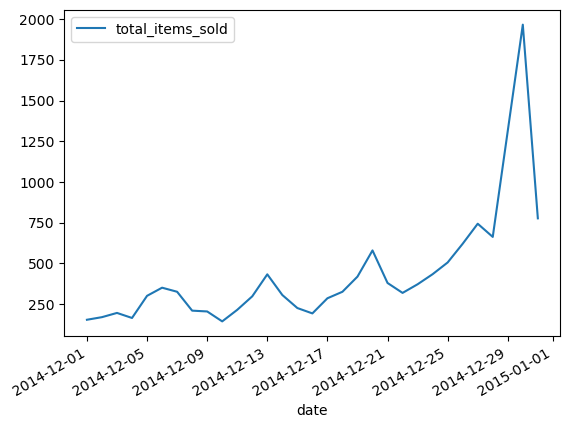

In [37]:
_ = total_items_sold_per_day_at_2014_12.plot(x='date', y='total_items_sold')

In [38]:
import seaborn as sns

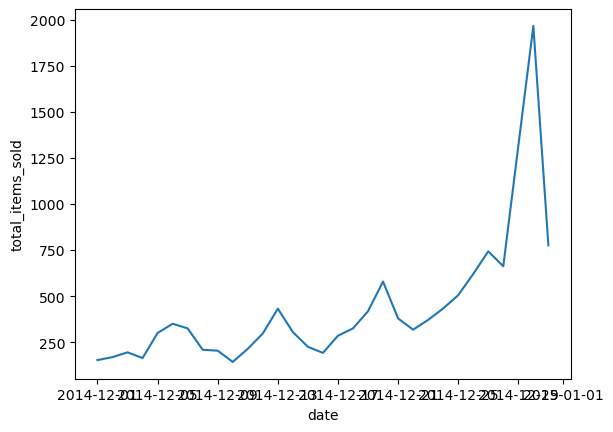

In [39]:
_ = sns.lineplot(total_items_sold_per_day_at_2014_12, x='date', y='total_items_sold')

In [40]:
import plotly.express as px

In [41]:
px.line(
    total_items_sold_per_day_at_2014_12, 
    x='date', 
    y='total_items_sold', 
    width=800, 
    height=600, 
    markers=True, 
    title="Daily total sold item count at 2014 Dec. shop_id(25)",
)

In [42]:
total_items_sold_per_day_at_2014_12.total_items_sold.var(ddof=1)

117167.70229885059

In [43]:
transactions_r = transactions.loc[
    (transactions['date'].dt.year == 2014) 
    & (transactions['date'].dt.month == 12 )  
    & (transactions['shop_id'] == 25)
]

transactions_r.head()


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue
2295837,2014-12-14,23,25,21752,399.00,1.00,399.00
2295838,2014-12-13,23,25,21752,399.00,3.00,"1,197.00"
2295839,2014-12-26,23,25,21733,149.00,1.00,149.00
2295840,2014-12-31,23,25,21732,149.00,1.00,149.00
2295841,2014-12-30,23,25,21726,149.00,1.00,149.00


In [44]:
transactions_r = transactions_r.groupby('date')['item_cnt_day'].sum().reset_index(name ='total_count')

transactions_r.head()

,date,total_count
0,2014-12-01,153.00
1,2014-12-02,169.00
2,2014-12-03,195.00
3,2014-12-04,164.00
4,2014-12-05,300.00


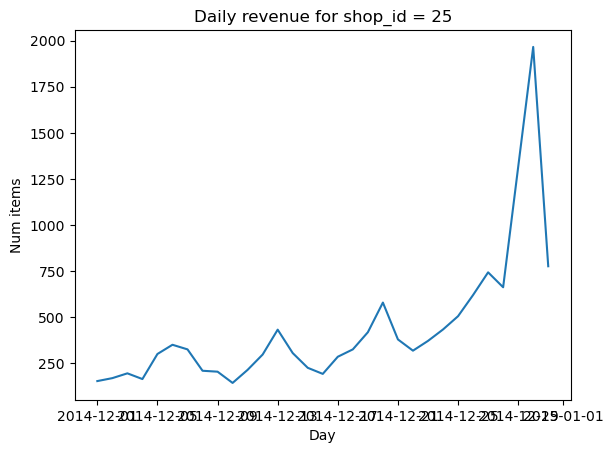

total_num_items_sold_var 117167.70229885059


In [45]:
shop_id = 25

total_num_items_sold = transactions_r['total_count']# YOUR CODE GOES HERE
days = transactions_r['date'] # YOUR CODE GOES HERE

# Plot it
plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()

total_num_items_sold_var = np.var(total_num_items_sold, ddof=1) # PUT YOUR ANSWER IN THIS VARIABLE
print('total_num_items_sold_var', total_num_items_sold_var)

## Authorization & Submission
To submit assignment to Cousera platform, please, enter your e-mail and token into the variables below. You can generate token on the programming assignment page. *Note:* Token expires 30 minutes after generation.

In [46]:
# STUDENT_EMAIL = 'brandon.hy.lin.0@gmail.com' # EMAIL HERE
# STUDENT_TOKEN = '0RcjLg1t365D5uE1' # TOKEN HERE
# grader.status()

In [47]:
# grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Well done! :)